In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
#import warnings; warnings.filterwarnings("ignore")

# Python dependences
import os, time
import numpy as np   # Numpy - Python's numerical library
import matplotlib.pyplot as plt  # Matplotlib - Python's plotting library
from copy import deepcopy   # Python module for copying objects

# Import plotting basemap
from openquake.hazardlib.nrml import to_python
from openquake.plt.mapping import HMTKBaseMap

# Input and Output Tools
# Catalogue and sources 
from openquake.hmtk.parsers.catalogue import CsvCatalogueParser   # Reads an earthquake catalogue from CSV
from openquake.hmtk.parsers.catalogue.csv_catalogue_parser import CsvCatalogueWriter  # Writes an earthquake catalogue to CSV
from openquake.hmtk.parsers.source_model.nrml04_parser import nrmlSourceModelParser  # Imports a source model from XML


# Complex fault source

In [3]:
source_model_file = "test-sources/complexfaults.xml"
source_model = to_python(source_model_file) # initiate source model parser

# Parse the seismic sources and save them into a variable called "source_model"
#source_model = parser.read_file("ComplexFaultSourceClassicalPSHA") # You must supply a name for the source model

In [4]:
type(source_model)

openquake.hazardlib.nrml.SourceModel

In [5]:
map_config = {'min_lon': -2.5, 'max_lon': 2.5,
              'min_lat': -2.5, 'max_lat': 2.5,
              'title': 'ComplexFaultSourceClassicalPSHA'}

In [6]:
finame='ComplexFaultSourceClassicalPSHA.jpg'
basemap1 = HMTKBaseMap(map_config, output_folder='ComplexFaultSourceClassicalPSHA', overwrite=True)
basemap1.add_source_model(source_model) 

basemap1.savemap(verb=1, filename=finame, save_script=True)


gmt begin
gmt figure ComplexFaultSourceClassicalPSHA/ComplexFaultSourceClassicalPSHA jpg
gmt basemap -R-2.5/2.5/-2.5/2.5 -JM15c -BWSne+t"ComplexFaultSourceClassicalPSHA" -Bx2.0 -By2.0
gmt coast -Di -R-2.5/2.5/-2.5/2.5 -JM15c -Wthin -Gwheat
gmt makecpt -Cjet -T0/35.00000001352754/2> ComplexFaultSourceClassicalPSHA/cf_tmp.cpt
gmt plot ComplexFaultSourceClassicalPSHA/mtkComplexFaultPoints.csv -CComplexFaultSourceClassicalPSHA/cf_tmp.cpt -Ss0.075 -t90
gmt colorbar -DJBC -Ba10+l"Depth to complex fault surface (km)" -CComplexFaultSourceClassicalPSHA/cf_tmp.cpt
gmt plot ComplexFaultSourceClassicalPSHA/mtkComplexFaultOutline.csv -Wthick,black
gmt end
Map saved to ComplexFaultSourceClassicalPSHA/ComplexFaultSourceClassicalPSHA.jpg.
GMT script written to ComplexFaultSourceClassicalPSHA/ComplexFaultSourceClassicalPSHA.sh.


In [7]:
from IPython.display import Image, HTML, display
from glob import glob
imagesList=''.join( ["<img style='width: 360px; margin: 0px; float: left; border: 1px solid black; background: #CCC' src='%s' />" % str(s) 
                     for s in ['ComplexFaultSourceClassicalPSHA/ComplexFaultSourceClassicalPSHA.jpg','ComplexFaultSourceClassicalPSHA/ComplexFaultSourceClassicalPSHA.jpg'] ])
display(HTML(imagesList))

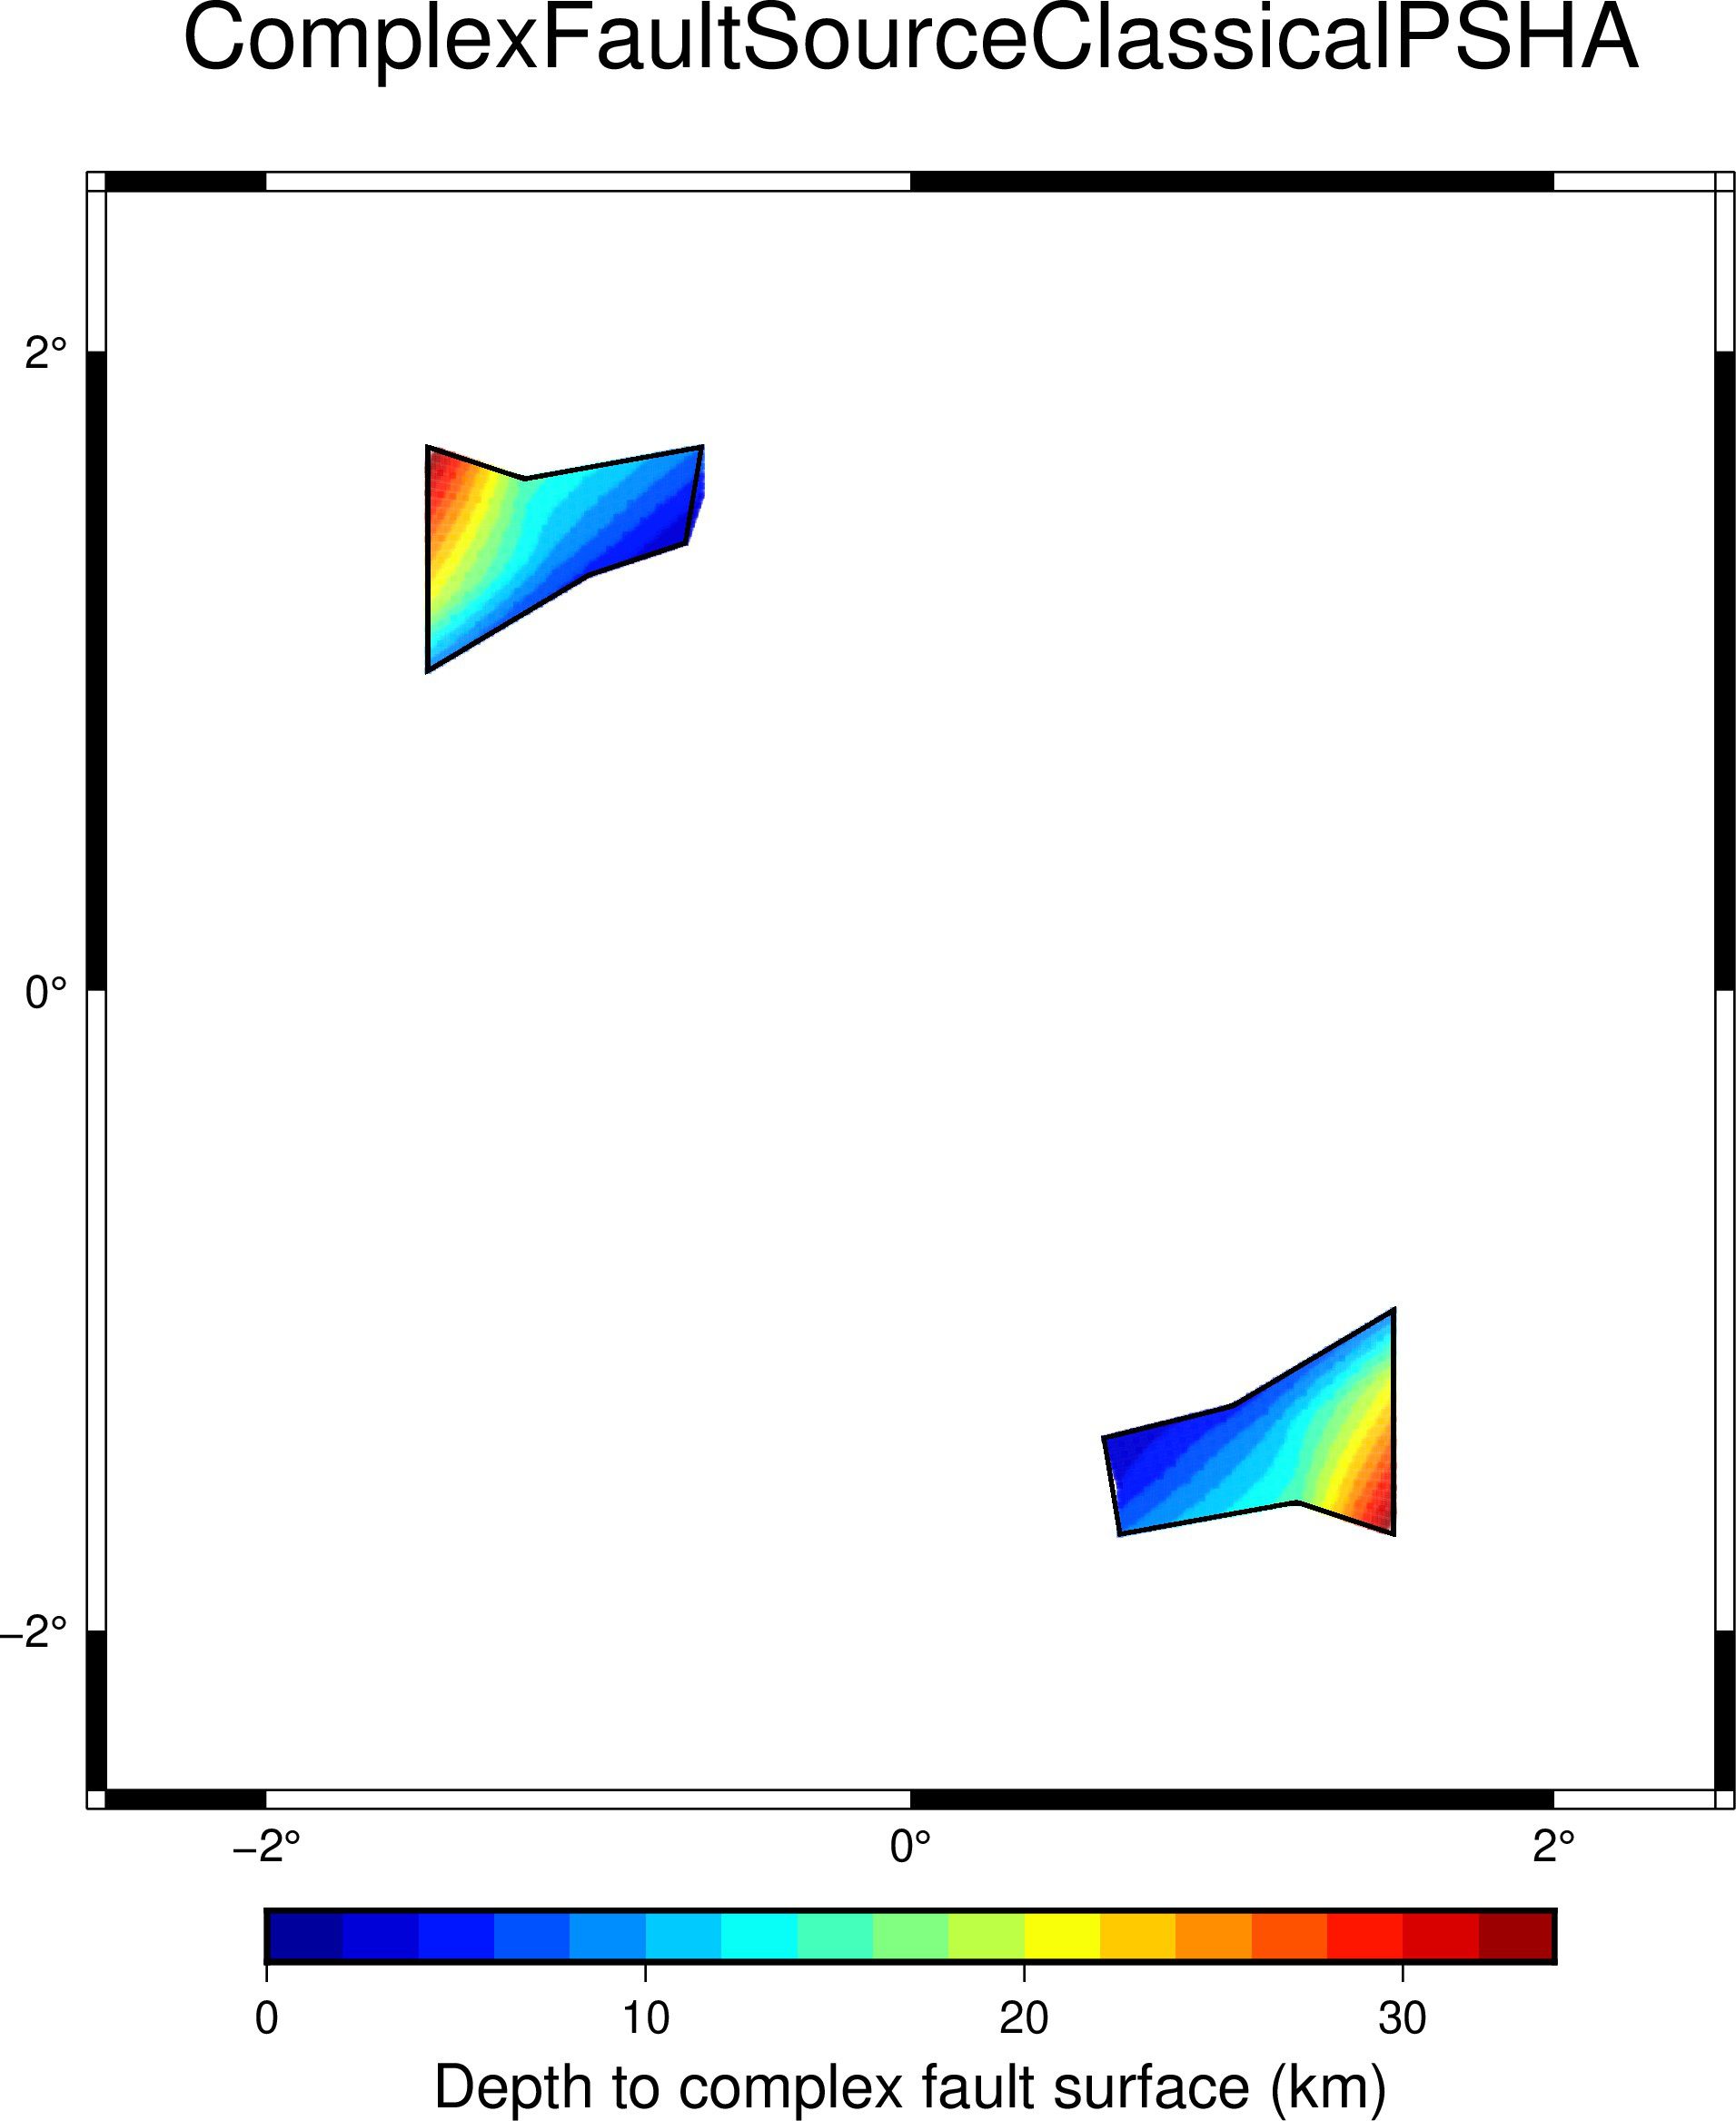

In [8]:
from wand.image import Image as WImage
WImage(filename='ComplexFaultSourceClassicalPSHA/ComplexFaultSourceClassicalPSHA.jpg')

In [9]:
source_model_file = "test-sources/pointsources.xml"
source_model = to_python(source_model_file) # initiate source model parser

In [10]:
map_config = {'min_lon': 179, 'max_lon': 181,
              'min_lat': -1, 'max_lat': 1,
              'title': 'PointSourceClassicalPSHA'}

In [11]:
finame='PointSourceClassicalPSHA.pdf'
basemap1 = HMTKBaseMap(map_config, output_folder='PointSourceClassicalPSHA', overwrite=True)
basemap1.add_source_model(source_model) 

basemap1.savemap(verb=1, filename=finame)


gmt begin
gmt figure PointSourceClassicalPSHA/PointSourceClassicalPSHA pdf
gmt basemap -R179/181/-1/1 -JM15c -BWSne+t"PointSourceClassicalPSHA" -Bx2.0 -By2.0
gmt coast -Di -R179/181/-1/1 -JM15c -Wthin -Gwheat
gmt plot PointSourceClassicalPSHA/mtkPointSource.csv -Ss0.15 -Gred
gmt end
Map saved to PointSourceClassicalPSHA/PointSourceClassicalPSHA.pdf.


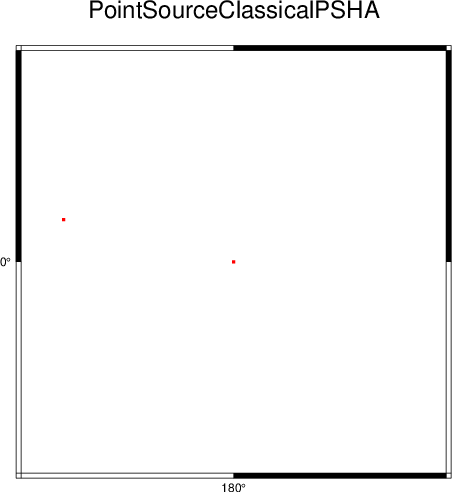

In [12]:
from wand.image import Image as WImage
WImage(filename='PointSourceClassicalPSHA/PointSourceClassicalPSHA.pdf')

# Simple fault source

In [13]:
from openquake.hazardlib.sourceconverter import SourceConverter
source_model_file = "test-sources/simplefaults.xml"
conv = SourceConverter(width_of_mfd_bin=0.5)
source_model = to_python(source_model_file, conv) # initiate source model parser

In [14]:
map_config = {'min_lon': -2, 'max_lon': 2,
              'min_lat': -2, 'max_lat': 2,
              'title': 'SimpleFaultSourceClassicalPSHA'}

In [15]:
finame='SimpleFaultSourceClassicalPSHA.pdf'
basemap1 = HMTKBaseMap(map_config, output_folder='SimpleFaultSourceClassicalPSHA', overwrite=True)
basemap1.add_source_model(source_model) 

basemap1.savemap(verb=1, filename=finame)

gmt begin
gmt figure SimpleFaultSourceClassicalPSHA/SimpleFaultSourceClassicalPSHA pdf
gmt basemap -R-2/2/-2/2 -JM15c -BWSne+t"SimpleFaultSourceClassicalPSHA" -Bx2.0 -By2.0
gmt coast -Di -R-2/2/-2/2 -JM15c -Wthin -Gwheat
gmt makecpt -Cjet -T0/18.0/30+n > SimpleFaultSourceClassicalPSHA/sf_tmp.cpt
gmt plot SimpleFaultSourceClassicalPSHA/mtkSimpleFaultSurface.csv -CSimpleFaultSourceClassicalPSHA/sf_tmp.cpt -Ss0.075 -t50 
gmt colorbar -DJBC -Ba10+l"Depth to simple fault surface (km)" -CSimpleFaultSourceClassicalPSHA/sf_tmp.cpt
gmt plot SimpleFaultSourceClassicalPSHA/mtkSimpleFaultProjection.csv -Wblack
gmt plot SimpleFaultSourceClassicalPSHA/mtkSimpleFaultTrace.csv -Wthick,black
gmt end
Map saved to SimpleFaultSourceClassicalPSHA/SimpleFaultSourceClassicalPSHA.pdf.


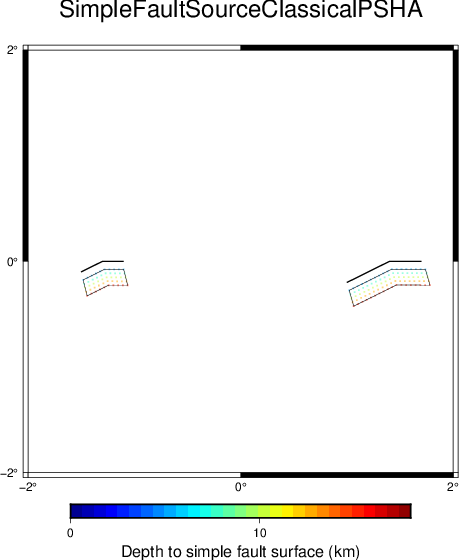

In [16]:
from wand.image import Image as WImage
WImage(filename='SimpleFaultSourceClassicalPSHA/SimpleFaultSourceClassicalPSHA.pdf')

# Area source

In [17]:
source_model_file = "test-sources/areasources.xml"
source_model = to_python(source_model_file) # initiate source model parser

In [18]:
map_config = {'min_lon': -2, 'max_lon': 2,
              'min_lat': -2, 'max_lat': 2,
              'title': 'AreaSourceClassicalPSHA'}

In [19]:
finame='AreaSourceClassicalPSHA.pdf'
basemap1 = HMTKBaseMap(map_config, output_folder='AreaSourceClassicalPSHA', overwrite=True)
basemap1.add_source_model(source_model) 

basemap1.savemap(verb=1, filename=finame)

gmt begin
gmt figure AreaSourceClassicalPSHA/AreaSourceClassicalPSHA pdf
gmt basemap -R-2/2/-2/2 -JM15c -BWSne+t"AreaSourceClassicalPSHA" -Bx2.0 -By2.0
gmt coast -Di -R-2/2/-2/2 -JM15c -Wthin -Gwheat
gmt plot AreaSourceClassicalPSHA/mtkAreaSource.csv -L -Wthick,blue
gmt end
Map saved to AreaSourceClassicalPSHA/AreaSourceClassicalPSHA.pdf.


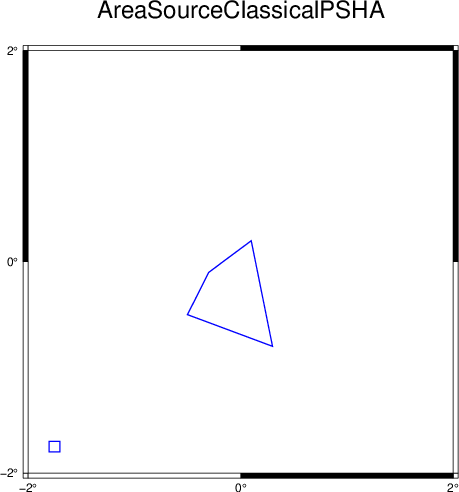

In [20]:
from wand.image import Image as WImage
WImage(filename='AreaSourceClassicalPSHA/AreaSourceClassicalPSHA.pdf')

# Focal Mechanisms 

In [21]:
map_config = {'min_lon': 24, 'max_lon': 33,
              'min_lat': 32, 'max_lat': 36,
              'title': 'Focal Mechanisms'}

In [22]:
basemap1 = HMTKBaseMap(map_config, output_folder='FocalMech', projection='-JM30', overwrite=True)
filename = '/Users/kjohnson/GEM/oq-mbtk/openquake/plt/demo/input_data/FM_mockset.csv'
basemap1.add_focal_mechanism(filename, 'MT')
finame = 'FocalMech.pdf'
basemap1.savemap(verb=1, filename=finame)

gmt begin
gmt figure FocalMech/FocalMech pdf
gmt basemap -R24/33/32/36 -JM30 -BWSne+t"Focal Mechanisms" -Bx2.0 -By2.0
gmt coast -Di -R24/33/32/36 -JM30 -Wthin -Gwheat
gmt psmeca /Users/kjohnson/GEM/oq-mbtk/openquake/plt/demo/input_data/FM_mockset.csv -Sm0.5 -t20
gmt end
Map saved to FocalMech/FocalMech.pdf.


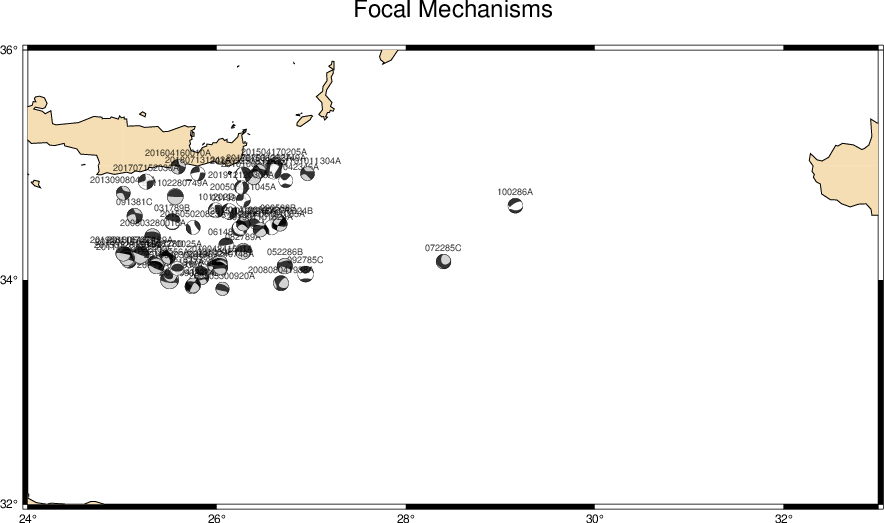

In [23]:
from wand.image import Image as WImage
WImage(filename='FocalMech/FocalMech.pdf')

In [24]:
from openquake.hmtk.parsers.catalogue import CsvCatalogueParser   # Reads an earthquake catalogue from CSV

catalogue_file = "input_data/Aegean_ExtendedCat1.csv"
parser = CsvCatalogueParser(catalogue_file) # initiate catalogue parser 
catalogue = parser.read_file(start_year=1900) # load only earthquakes after year 1900


Catalogue Attribute Identifier is not a recognised catalogue key


In [25]:
lons = catalogue.data['longitude']
lats = catalogue.data['latitude']
mags = catalogue.data['magnitude']
depths = catalogue.data['depth']

In [26]:
# Find limits of the catalogue
llon, ulon, llat, ulat = catalogue.get_bounding_box()

map_config = {'min_lon': np.floor(llon), 'max_lon': np.ceil(ulon),
              'min_lat': np.floor(llat), 'max_lat': np.ceil(ulat),
              'title': 'Seismicity: color scaled'}

# Initialize a toolkit basemap
basemap1 = HMTKBaseMap(map_config, output_folder='gmt2', overwrite=True)

basemap1.add_colour_scaled_points(lons, lats, mags, label="Magnitude")
finame = 'colorscaled.jpg'
basemap1.savemap(verb=True, filename=finame)

gmt begin
gmt figure gmt2/colorscaled jpg
gmt basemap -R18.0/33.0/32.0/43.0 -JM15c -BWSne+t"Seismicity: color scaled" -Bx2.0 -By2.0
gmt coast -Di -R18.0/33.0/32.0/43.0 -JM15c -Wthin -Gwheat
gmt makecpt -Cjet -T2.35/7.7/30+n -D >                              gmt2/tmp_col_dat.cpt
gmt plot gmt2/tmp_dat_colMagnitude.csv -Ss0.3c -Cgmt2/tmp_col_dat.cpt
gmt colorbar -DJBC -Ba+lMagnitude -Cgmt2/tmp_col_dat.cpt 
gmt end
Map saved to gmt2/colorscaled.jpg.


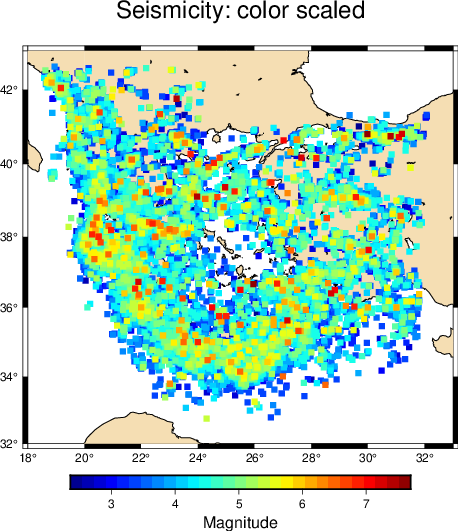

In [27]:
from wand.image import Image as WImage
WImage(filename='gmt2/colorscaled.pdf')

In [28]:
# Find limits of the catalogue
llon, ulon, llat, ulat = catalogue.get_bounding_box()

map_config = {'min_lon': np.floor(llon), 'max_lon': np.ceil(ulon),
              'min_lat': np.floor(llat), 'max_lat': np.ceil(ulat),
              'title': 'Seismicity: size scaled'}

# Initialize a toolkit basemap
basemap1 = HMTKBaseMap(map_config, output_folder='gmt2', overwrite=True)
basemap1.add_size_scaled_points(lons, lats, mags, color='yellow', smin=0.05, coeff=0.01, label='Magnitude')
#basemap1.add_size_scaled_points(lons, lats, depths, color='yellow', smin=0.1, coeff=0.05, sscale=0.5, label='Depth (km)')
finame = 'sizescaled.jpg'
basemap1.savemap(verb=True, filename=finame)

gmt begin
gmt figure gmt2/sizescaled jpg
gmt basemap -R18.0/33.0/32.0/43.0 -JM15c -BWSne+t"Seismicity: size scaled" -Bx2.0 -By2.0
gmt coast -Di -R18.0/33.0/32.0/43.0 -JM15c -Wthin -Gwheat
gmt plot gmt2/tmp_dat_sizeMagnitude.csv -Ssc -Gyellow -Wblack
gmt legend gmt2/legend_ss.txt -DJMR -C0.3c --FONT_ANNOT_PRIMARY=12p
gmt end
Map saved to gmt2/sizescaled.jpg.


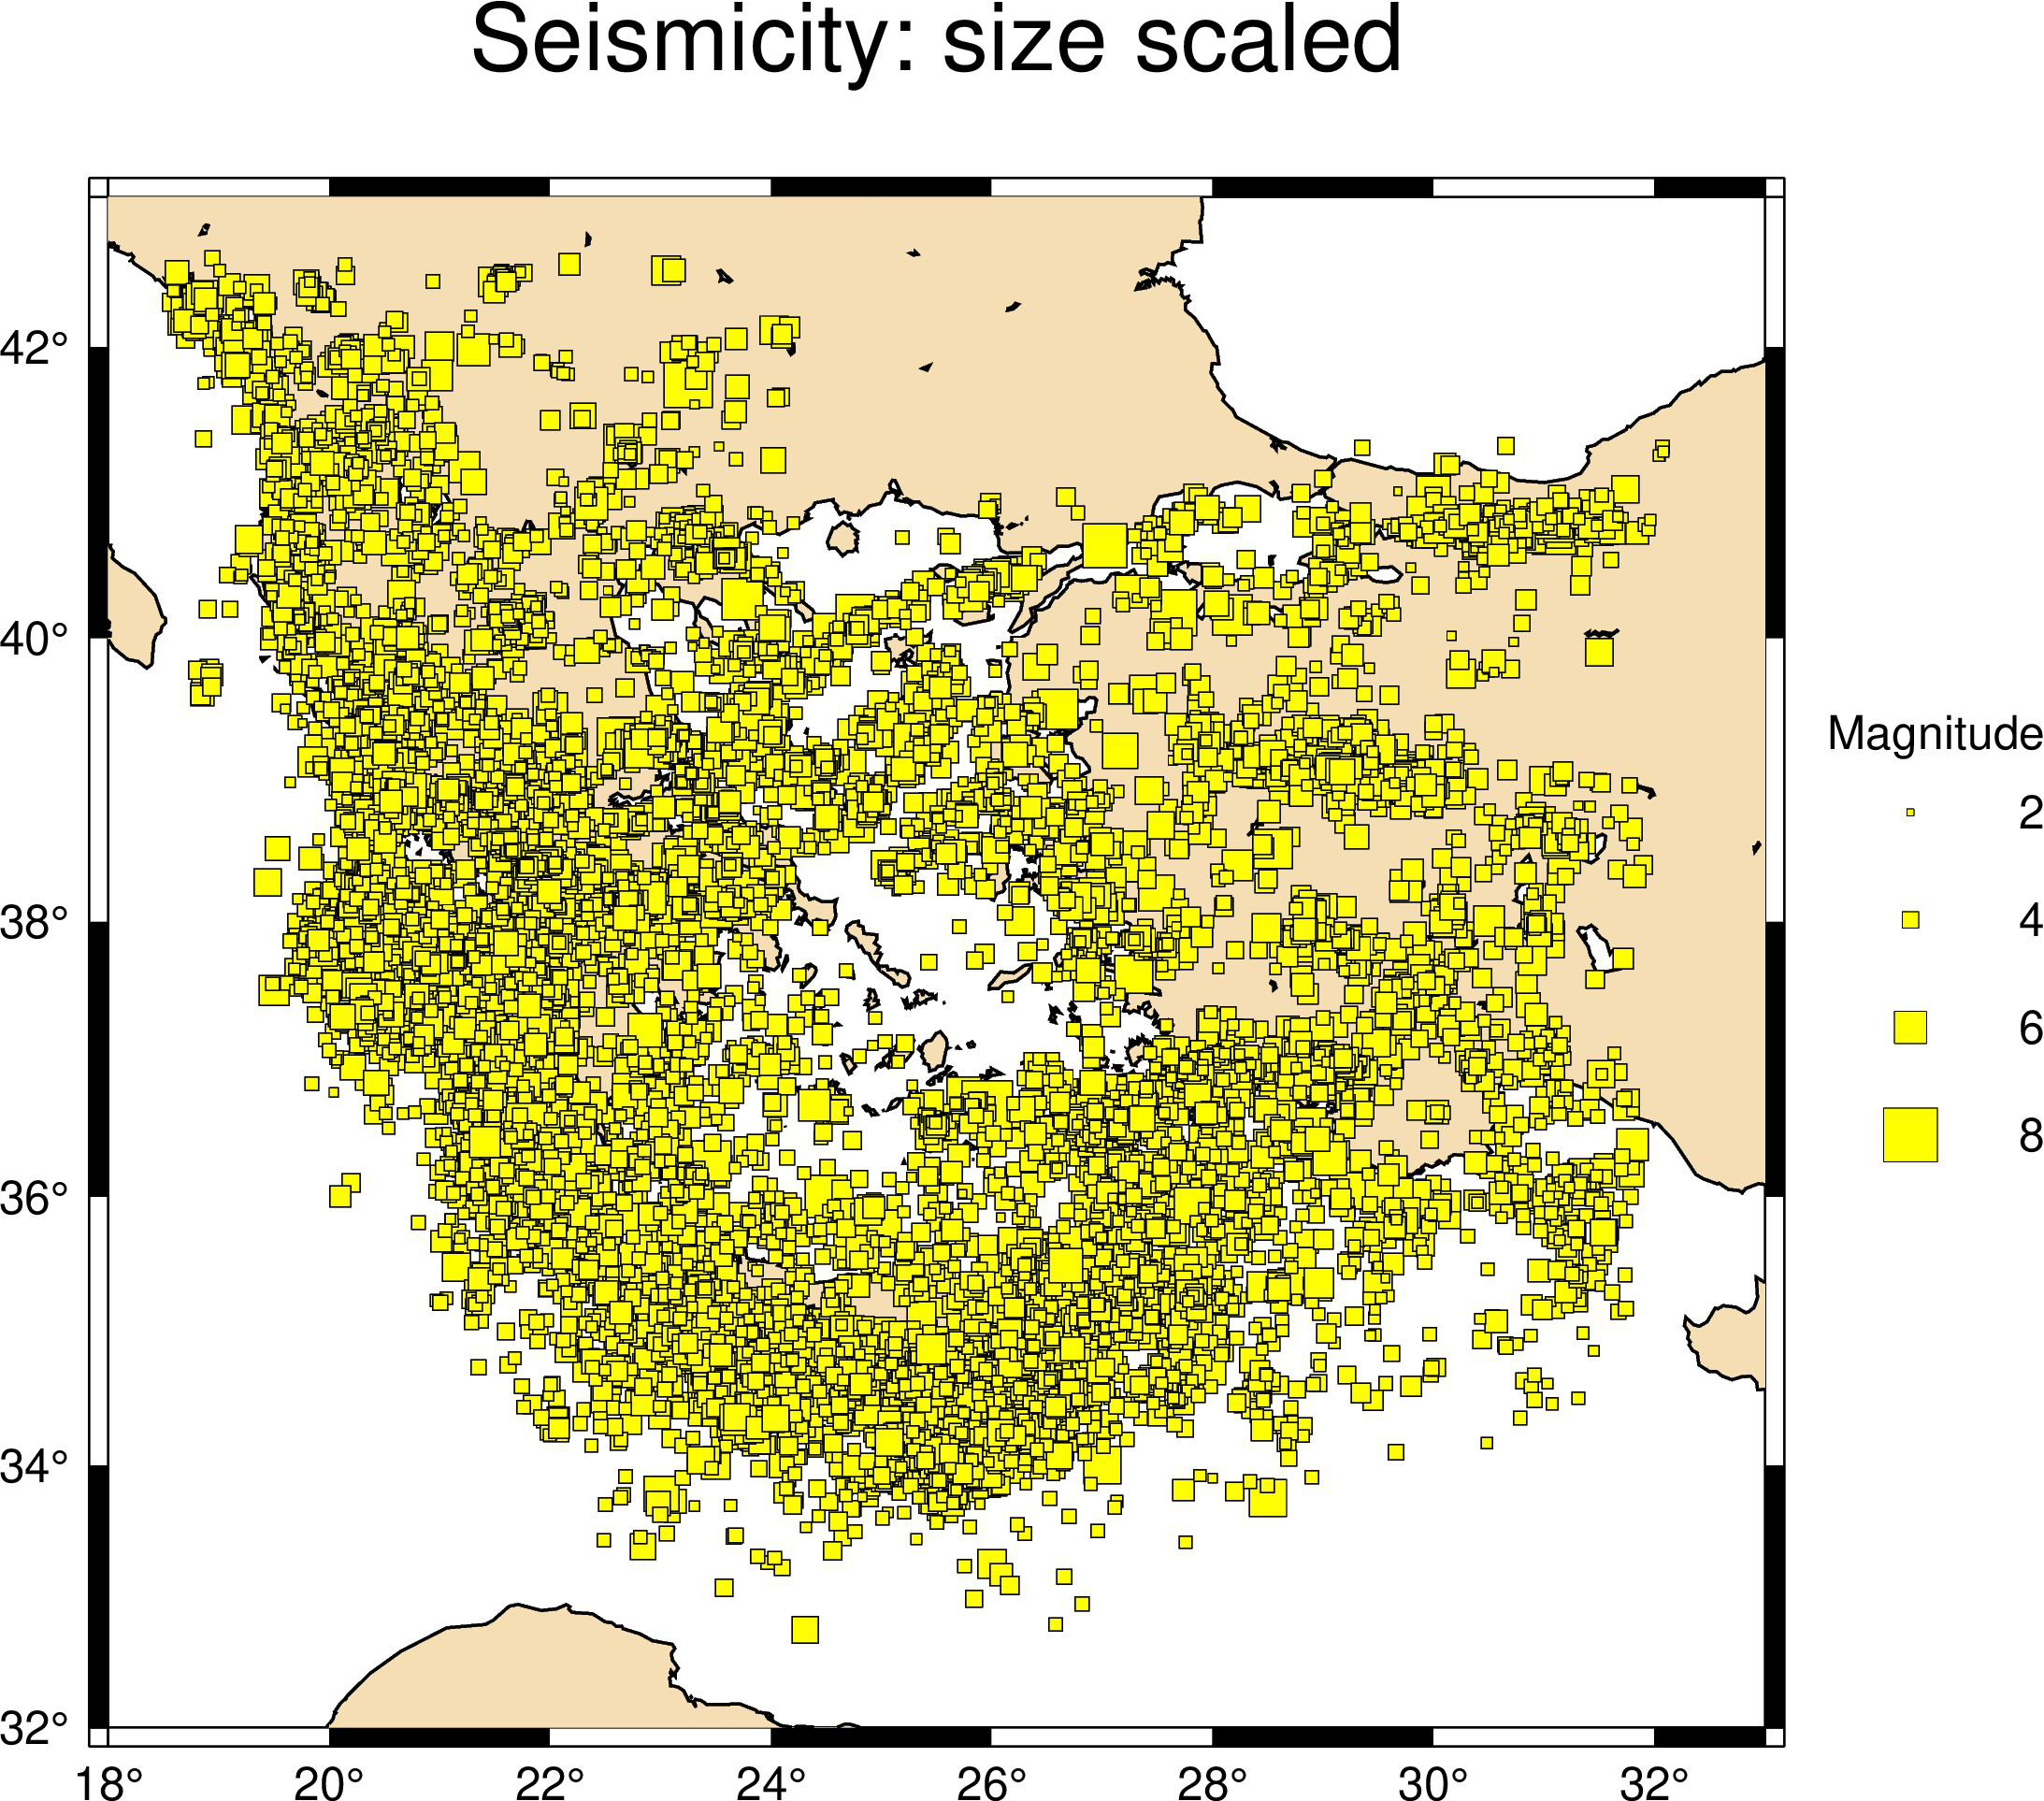

In [29]:
from wand.image import Image as WImage
WImage(filename='gmt2/sizescaled.jpg')

In [30]:
from openquake.hmtk.seismicity.selector import CatalogueSelector
map_config = {'min_lon': np.floor(llon), 'max_lon': np.ceil(ulon),
              'min_lat': np.floor(llat), 'max_lat': np.ceil(ulat),
              'title': 'Earthquake catalogue'}

selector1 = CatalogueSelector(catalogue, create_copy=True)
catalogue1 = selector1.within_magnitude_range(lower_mag=4)
#selector2 = CatalogueSelector(catalogue, create_copy=True)
#catalogue2 = selector2.within_depth_range(lower_depth=100)

basemap1 = HMTKBaseMap(map_config, output_folder='cat', overwrite=True)

basemap1.add_catalogue(catalogue1)#, logscale=False)#, cpt_file='test_cpt.cpt')
finame = 'catalogue.jpg'
basemap1.savemap(filename=finame, save_script=True)

Map saved to cat/catalogue.jpg.
GMT script written to cat/catalogue.sh.


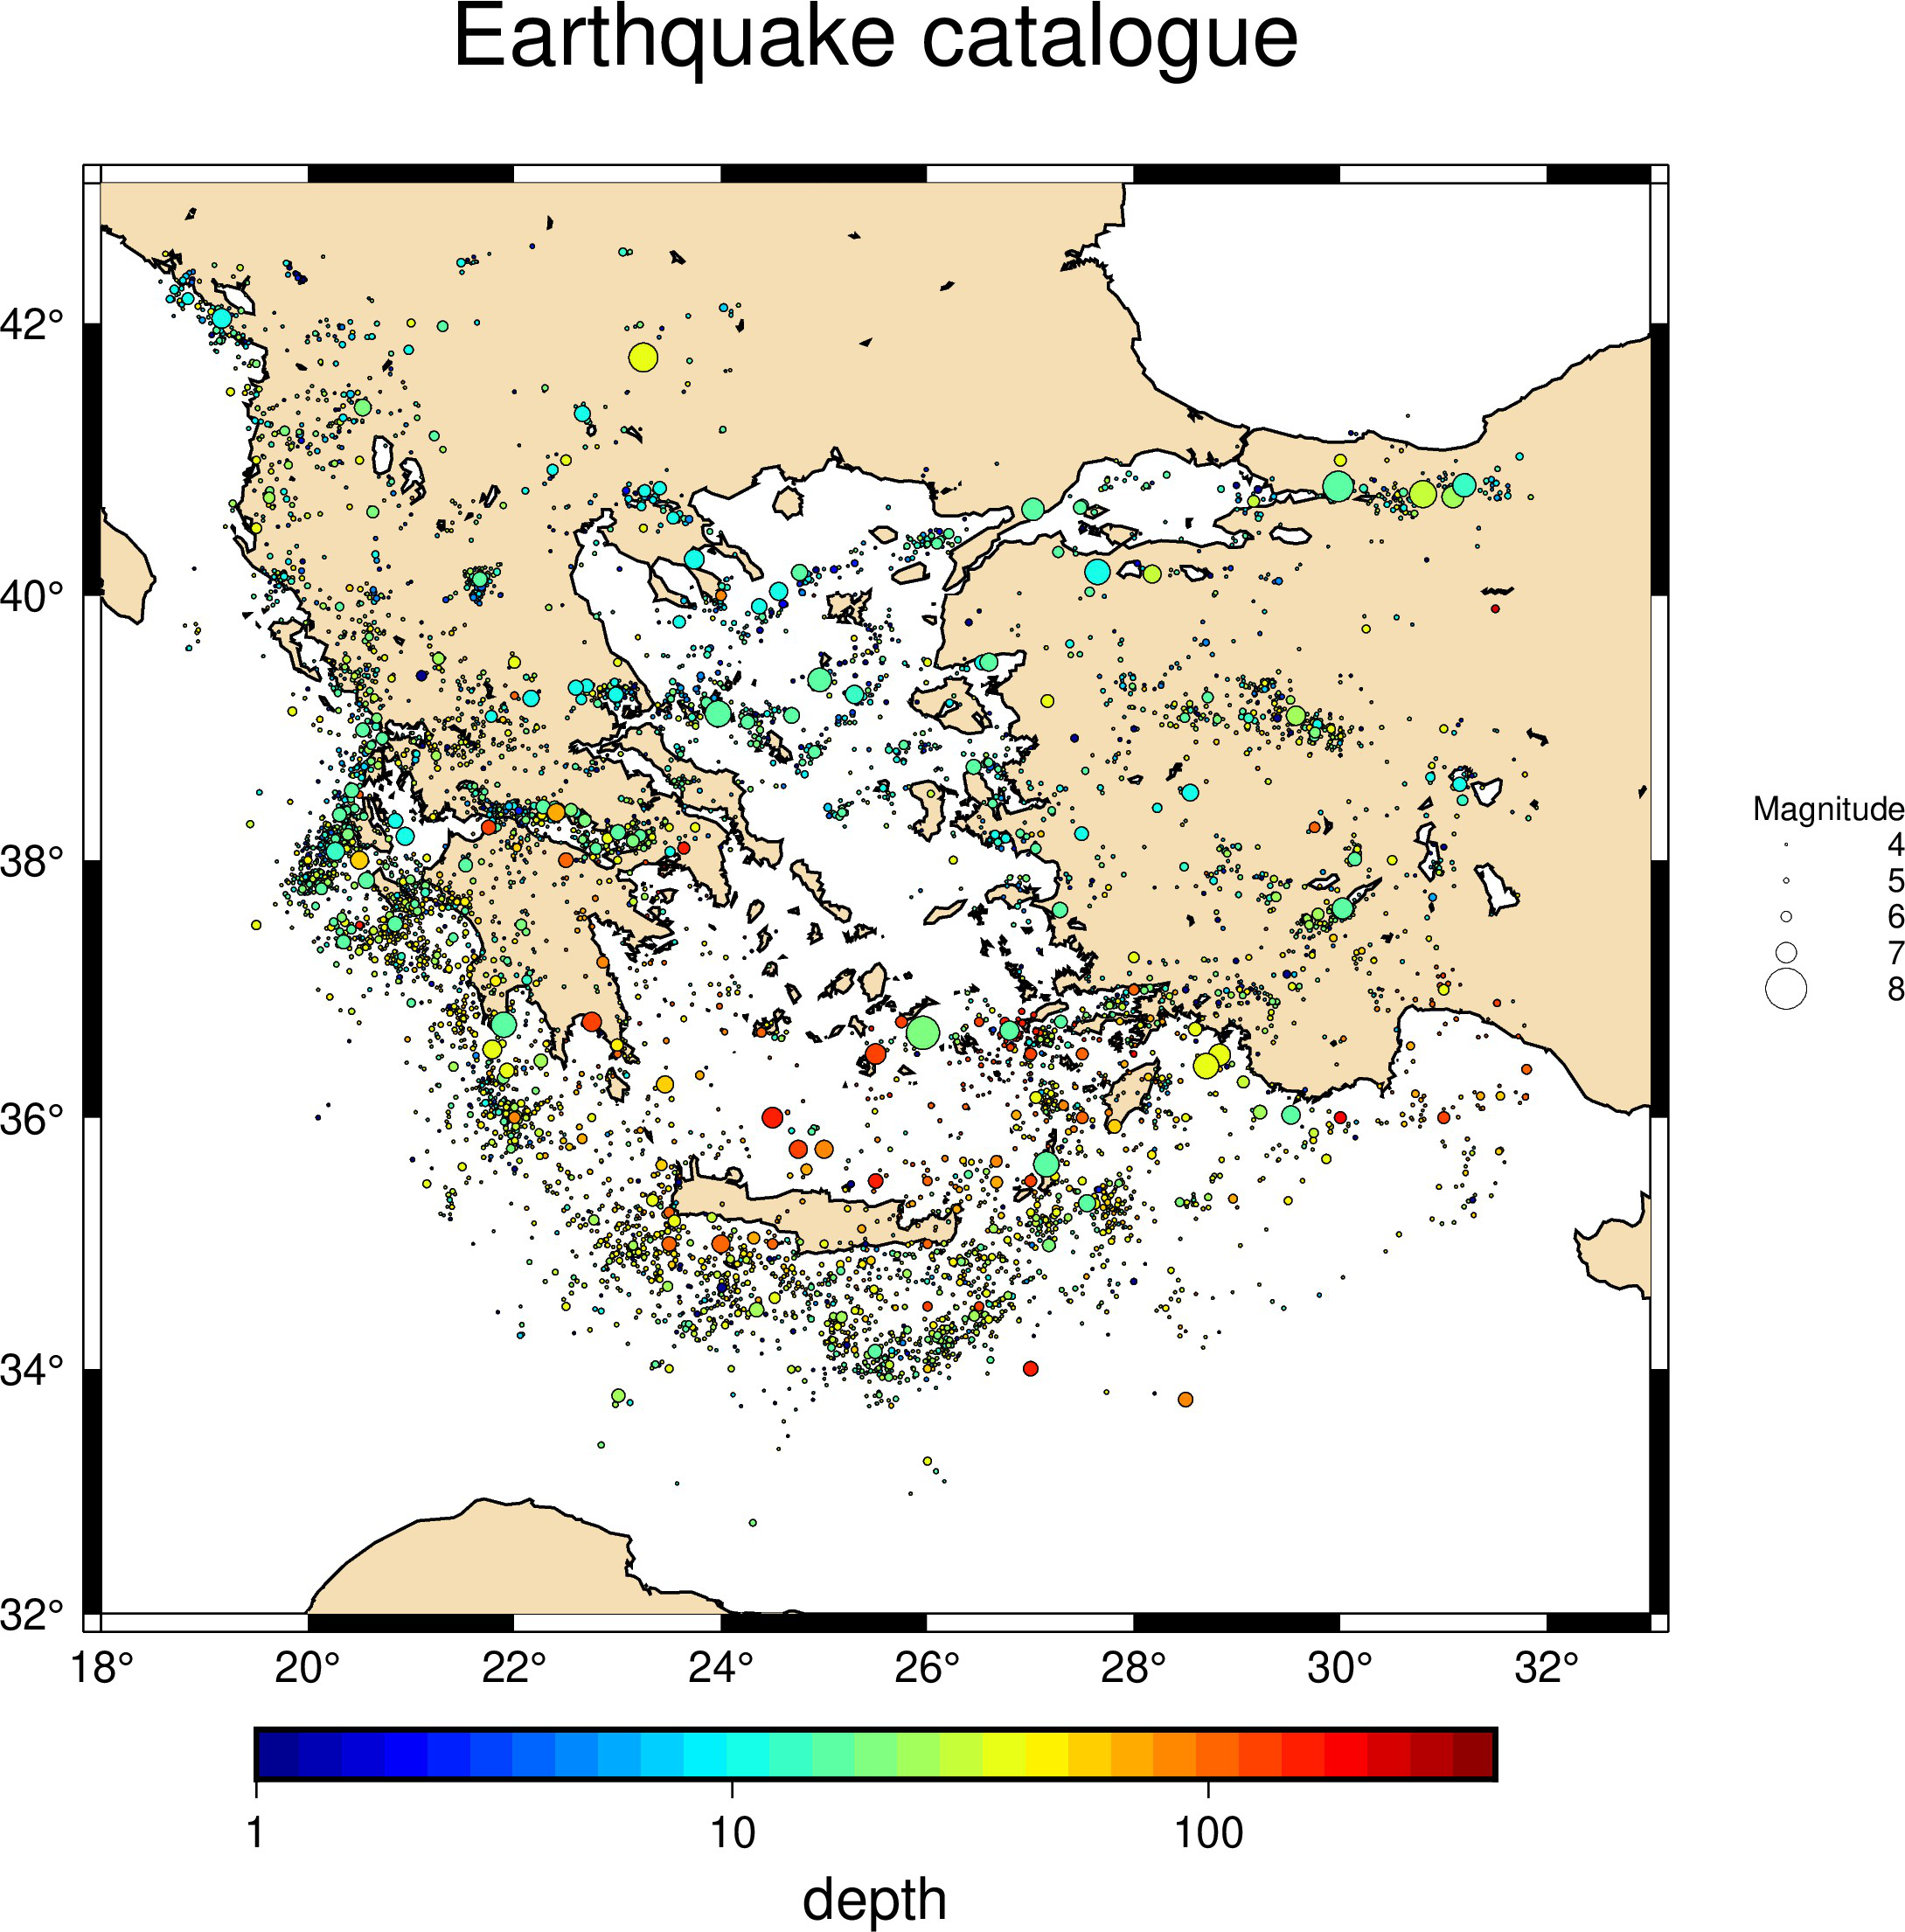

In [31]:
from wand.image import Image as WImage
WImage(filename='cat/catalogue.jpg')


# Aegean sea example

In [32]:
source_model = to_python('/Users/kjohnson/GEM/HazardMosaic/PNG/in/ssm/source_model_as_cs.xml')

In [33]:
map_config = {'min_lon': 130, 'max_lon': 162,
              'min_lat': -15, 'max_lat': 2,
              'title': 'Papua New Guinea source model'}

basemap1 = HMTKBaseMap(map_config, output_folder='phl', overwrite=True)
basemap1.add_source_model(source_model) 
#basemap1.add_source_model(source_model_2)
finame = 'PNGSourceModel.jpg'

basemap1.savemap(verb=1, filename=finame)

gmt begin
gmt figure phl/PNGSourceModel jpg
gmt basemap -R130/162/-15/2 -JM15c -BWSne+t"Papua New Guinea source model" -Bx2.0 -By2.0
gmt coast -Di -R130/162/-15/2 -JM15c -Wthin -Gwheat
gmt plot phl/mtkAreaSource.csv -L -Wthick,blue
gmt makecpt -Cjet -T0/60.00000003125358/2> phl/cf_tmp.cpt
gmt plot phl/mtkComplexFaultPoints.csv -Cphl/cf_tmp.cpt -Ss0.075 -t90
gmt colorbar -DJBC -Ba10+l"Depth to complex fault surface (km)" -Cphl/cf_tmp.cpt
gmt plot phl/mtkComplexFaultOutline.csv -Wthick,black
gmt end
Map saved to phl/PNGSourceModel.jpg.


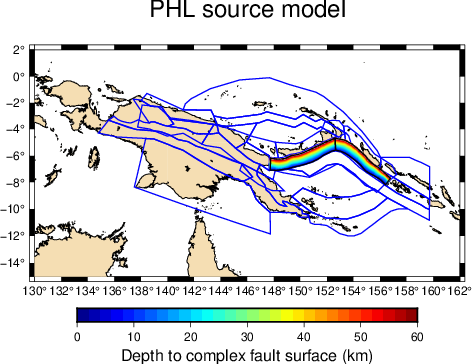

In [34]:
from wand.image import Image as WImage
WImage(filename='phl/PNGSourceModel.pdf')

In [35]:
%%bash
open .